In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data source: https://www.kaggle.com/datasets/shivamvadalia27/video-games/versions/1?resource=download

The Video Game Dataset contains 20,580 entries, with each entry representing a video game. The dataset includes 8 columns:

id: Unique identifier for each video game (data type: int64).
name: The title or name of the video game (data type: object).
released: The release date of the video game (data type: object).
added: The number of times the game has been added or favorited (data type: int64).
playtime: The average playtime in minutes (data type: int64).
reviews_count: The number of reviews for the video game (data type: int64).
ratings_count: The total number of ratings received by the game (data type: int64).
rating: The average rating score for the video game (data type: float64).


In [2]:
games = pd.read_csv("games.csv")

In [3]:
games.head()

,id,name,released,added,playtime,reviews_count,ratings_count,rating
0,3498,Grand Theft Auto V,2013-09-17,19385,73,6421,6332,4.47
1,3328,The Witcher 3: Wild Hunt,2015-05-18,18567,46,6122,6029,4.66
2,4200,Portal 2,2011-04-18,17494,11,5310,5263,4.62
3,5286,Tomb Raider (2013),2013-03-05,15290,10,3686,3660,4.05
4,4291,Counter-Strike: Global Offensive,2012-08-21,15174,65,3267,3236,3.57


In [4]:
games.sort_values(by="released")

,id,name,released,added,playtime,reviews_count,ratings_count,rating
16705,56681,The Oregon Trail (1971),1971-01-01,73,0,35,32,3.63
13256,53138,Pong (1972),1972-01-01,106,0,55,51,3.71
19495,52402,Breakout (1976),1976-01-01,51,0,23,21,3.30
11923,52444,Space Invaders (1978),1978-06-01,126,0,63,63,3.79
18219,52391,Adventure,1979-01-01,60,0,22,21,4.23
...,...,...,...,...,...,...,...,...
20496,51100,Raceland,NaN,45,1,3,3,0.00
20499,49886,Dogstar,NaN,45,0,1,1,0.00
20505,46765,Grape Jelly,NaN,45,2,0,0,0.00
20510,45126,CityBattle | Virtual Earth,NaN,45,1,4,3,0.00


In [15]:
games.dtypes

id                        int64
name                     object
released         datetime64[ns]
added                     int64
playtime                  int64
reviews_count             int64
ratings_count             int64
rating                  float64
dtype: object

In [11]:
games['released'] = pd.to_datetime(games['released'])

Filter the data to show games that are released since 2000.

In [21]:
games = games[games['released'] >'2000-01-01'].sort_values(by='released')

In [27]:
print(len(games))
print(len(games.name.unique()))

18773
18204


In [38]:
games['year_released'] = games['released'].dt.year

In [41]:
games_by_year = games.groupby('year_released').aggregate('mean')

In [42]:
games_by_year

,id,added,playtime,reviews_count,ratings_count,rating
year_released,,,,,,
2000,42523.880000,758.952000,2.856000,139.680000,138.800000,3.840000
2001,45121.359281,824.383234,3.784431,146.742515,145.329341,3.681018
2002,43020.623288,798.020548,3.205479,173.294521,171.993151,3.667534
2003,44931.132275,668.185185,3.571429,130.656085,129.544974,3.634339
2004,45376.029126,1148.611650,3.606796,228.495146,227.150485,3.776602
2005,47203.398148,750.532407,4.481481,140.347222,139.212963,3.688241
2006,33987.586873,700.571429,4.142857,113.976834,113.162162,3.318378
2007,29452.943262,1049.723404,4.776596,227.897163,225.921986,3.299929
2008,30651.585752,1014.424802,2.762533,175.163588,174.002639,3.052480


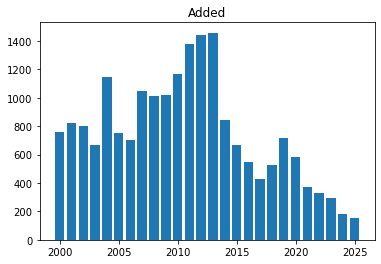

In [52]:
plt.bar(games_by_year.index, games_by_year['added'])
plt.title("Added")
plt.show()

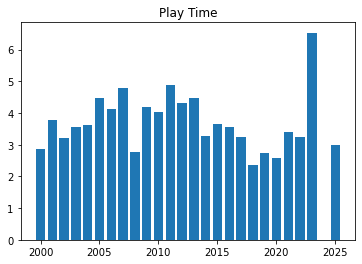

In [54]:
plt.bar(games_by_year.index, games_by_year['playtime'])
plt.title("Play Time")
plt.show()

3878     1
1177     1
19479    0
15896    0
17400    1
        ..
6443     0
6859     0
11037    0
15847    0
10729    3
Name: playtime, Length: 18773, dtype: int64